In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import json 


In [2]:
#import cleaned data
movie_data=pd.read_csv("clean_data.csv")
#display data
movie_data.head()


,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,TAGLINE,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,17000000,641.633,35878266,7.1,602,Escape The Apocalypse,2020,7,18020000,38030961,7
1,75000000,361.237,201858461,7.2,6022,Mind Over Mayhem,2020,5,79500000,213969968,7
2,90000000,337.346,419074646,7.2,5392,Ride together. Die together.,2020,1,95400000,444219124,7
3,42000000,253.895,30234182,7.0,3216,Being a superhero is in his blood,2020,5,44520000,32048232,7
4,200000000,279.470,103181419,7.9,3243,Their quest begineth.,2020,2,212000000,109372304,8


In [3]:
#display data info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BUDGET         4572 non-null   int64  
 1   POPULARITY     4572 non-null   float64
 2   REVENUE        4572 non-null   int64  
 3   VOTE_AVERAGE   4572 non-null   float64
 4   VOTE_COUNT     4572 non-null   int64  
 5   TAGLINE        4572 non-null   object 
 6   release_year   4572 non-null   int64  
 7   release_month  4572 non-null   int64  
 8   New_Budget     4572 non-null   int64  
 9   New_Revenue    4572 non-null   int64  
 10  New_Vote_Avg   4572 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 393.0+ KB


In [4]:
#display described data
movie_data.describe()

,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
count,4.572000e+03,4572.000000,4.572000e+03,4572.000000,4572.000000,4572.000000,4572.000000,4.572000e+03,4.572000e+03,4572.000000
mean,3.835248e+07,20.884273,1.104830e+08,6.364239,1913.553150,2006.503281,6.781277,5.274042e+07,1.499497e+08,6.356080
std,4.419597e+07,23.892179,1.973238e+08,0.849999,2897.829873,7.818284,3.487054,5.742878e+07,2.549560e+08,0.894366
min,1.000000e+00,0.600000,1.000000e+00,1.500000,1.000000,1990.000000,1.000000,1.000000e+00,1.000000e+00,2.000000
25%,1.000000e+07,10.469500,9.877214e+06,5.900000,258.000000,2001.000000,4.000000,1.258222e+07,1.390657e+07,6.000000
50%,2.400000e+07,14.990000,4.043829e+07,6.400000,851.000000,2007.000000,7.000000,3.304840e+07,5.510679e+07,6.000000
75%,5.000000e+07,23.652250,1.222798e+08,6.900000,2247.000000,2013.000000,10.000000,7.264950e+07,1.729094e+08,7.000000
max,3.800000e+08,641.633000,2.797801e+09,10.000000,27342.000000,2020.000000,12.000000,4.722640e+08,3.781250e+09,10.000000


NUMERICAL DATA
UNI VARIATE STAT


In [5]:
def Bi_Variate(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = var1, y = var2, height = 12)
    
   
   
def Correlation(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    
def Uni_Variate(data):
    
    data.describe()
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data = data, orient = "h", ax = axes[0])
    sb.boxplot(data = data, orient = "h", ax = axes[1])
    sb.histplot(data = data, ax = axes[2])

def PlotHist(data, var1: str, var2: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
    sb.histplot(data[var1], ax=ax1, kde=True)
    sb.histplot(data[var2], ax=ax2, kde=True)

def BoxPlot(movie_data, var: str):
    f = plt.figure(figsize=(24, 4))
    sb.boxplot(data = movie_data[var], orient = "h")

def ViolinPlot(movie_data, var: str):
    #Set up matplotlib figure with three subplots
    f, axes = plt.subplots(figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data=movie_data[var], orient = "h")
    
def fixskew(data):
    data = np.log(data + 1)

    f = plt.figure(figsize=(15,6))

    sb.histplot(data, kde=True)

Discover Popular Keywords in Tagline

In [48]:
movie_data['TAGLINE'].astype('str')

0                                   Escape The Apocalypse
1                                        Mind Over Mayhem
2                            Ride together. Die together.
3                       Being a superhero is in his blood
4                                   Their quest begineth.
                              ...                        
4567                                     Terror Has Teeth
4568               Lose your hang-ups. Find your calling.
4569                  How far can a losing shot take you?
4570    A comedy about doing the right thing with the ...
4571                                 Destroyed in love...
Name: TAGLINE, Length: 4572, dtype: object

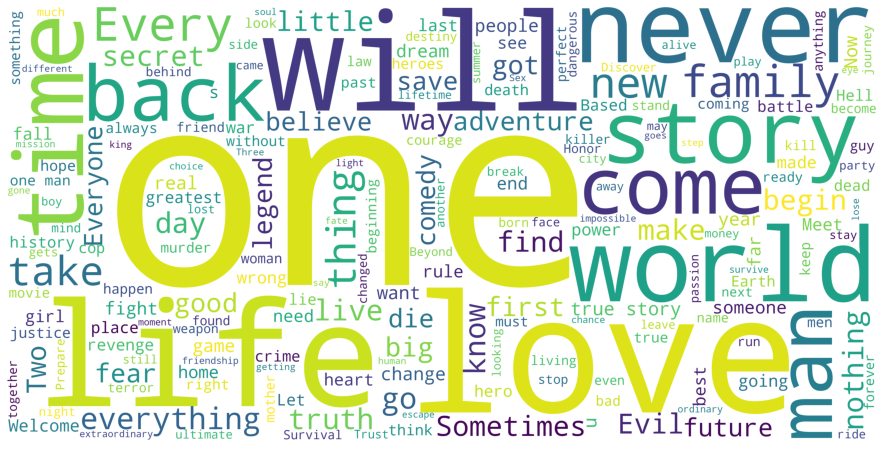

In [50]:
title_corpus = ' '.join(movie_data['TAGLINE'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

PREDICTING REVENUE USING BUDGET

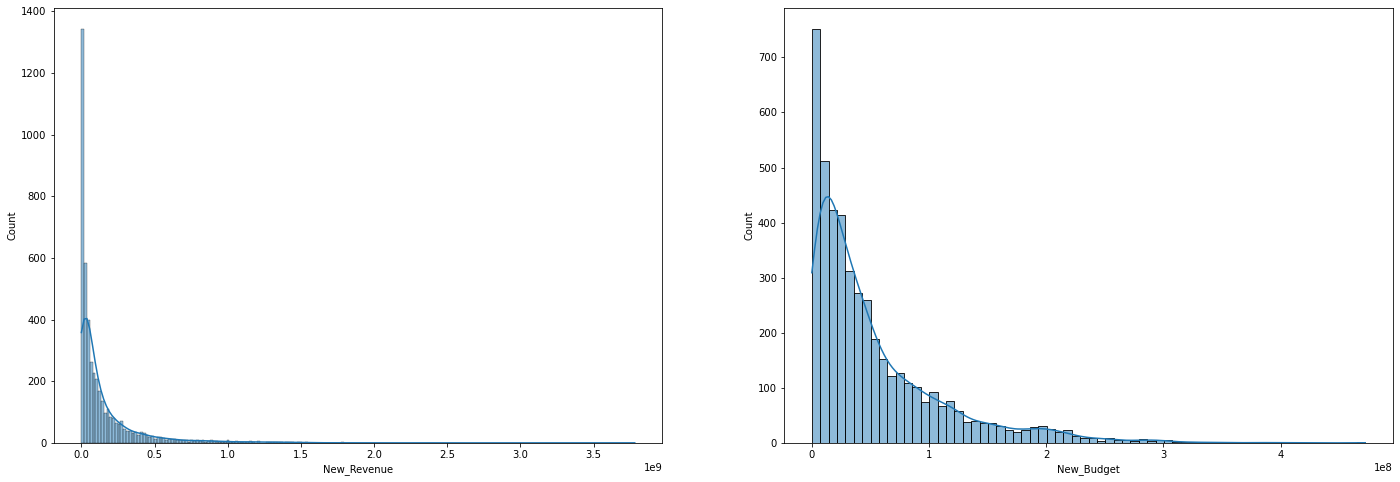

In [6]:
PlotHist(movie_data, "New_Revenue", "New_Budget")

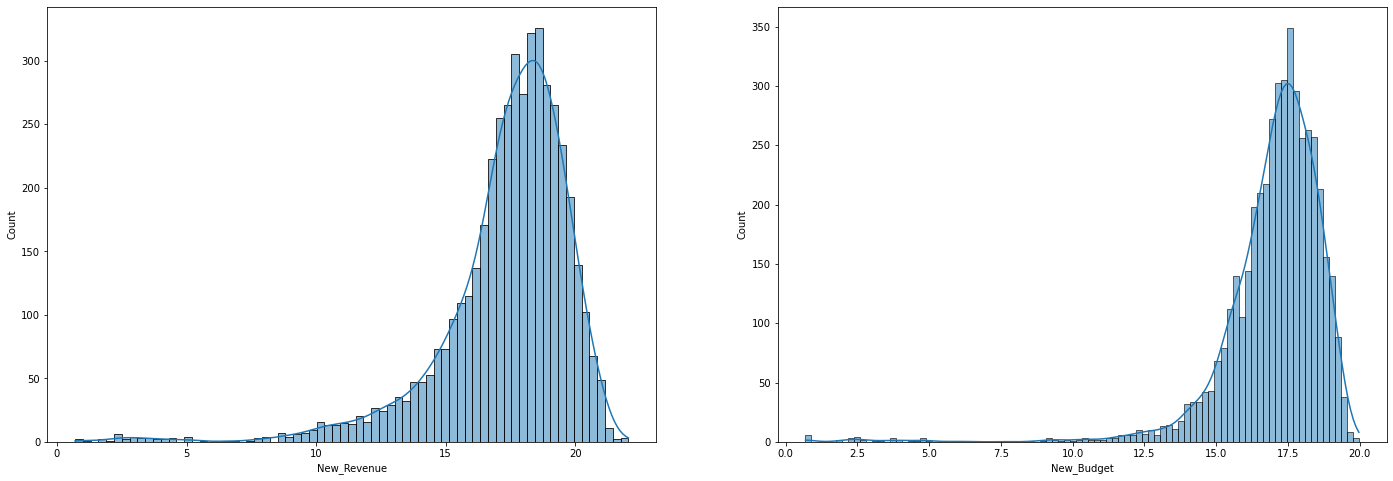

In [7]:
movie_data["New_Budget"] = np.log(movie_data["New_Budget"] + 1)
movie_data['New_Revenue'] = np.log(movie_data['New_Revenue'] + 1)

PlotHist(movie_data, 'New_Revenue', "New_Budget")

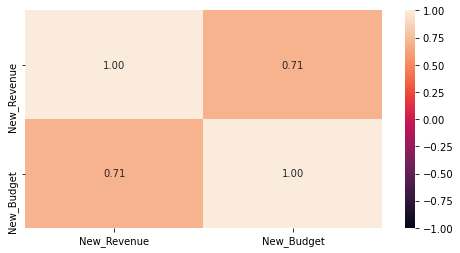

In [8]:
#Correlation between 2 variable/column
Correlation(movie_data, 'New_Revenue', "New_Budget")

<Figure size 1728x288 with 0 Axes>

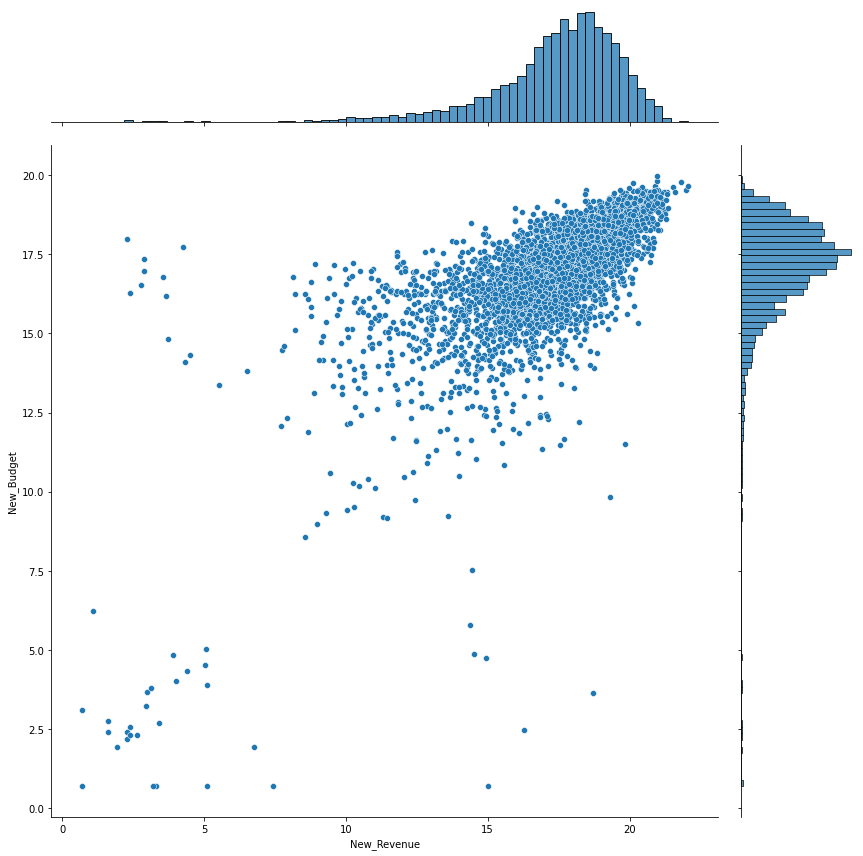

In [9]:
Bi_Variate(movie_data, 'New_Revenue', "New_Budget")

LINEAR REGRESSION FOR REVENUE AND BUDGET

In [42]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
LinearReg = LinearRegression()
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data["New_Budget"])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (3429, 1) (3429, 1)
Test Set  : (1143, 1) (1143, 1)


In [43]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [0.68372434]
Coefficients : a =  [[0.97917703]]


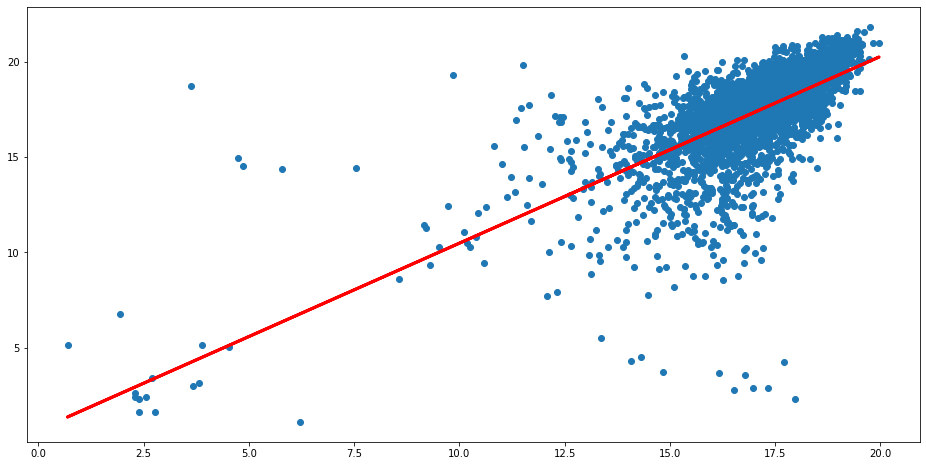

In [44]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Goodness of Fit of the Linear Regression Model

In [45]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
train_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, train_y_pred))

Explained Variance (R^2) 	: 0.47881300426157736
Mean Squared Error (MSE) 	: 3.1947334142297388


Prediction of Response based on the Predictor

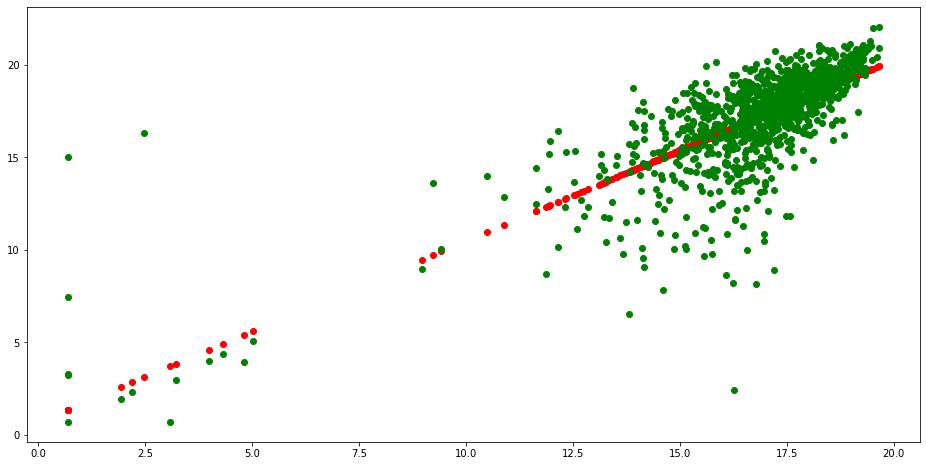

In [46]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

In [47]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y, test_y_pred))

Mean Squared Error (MSE) 	: 3.352599774585451


Predicting Revenue using Popularity

In [17]:
movie_data["POPULARITY"].describe()

count    4572.000000
mean       20.884273
std        23.892179
min         0.600000
25%        10.469500
50%        14.990000
75%        23.652250
max       641.633000
Name: POPULARITY, dtype: float64

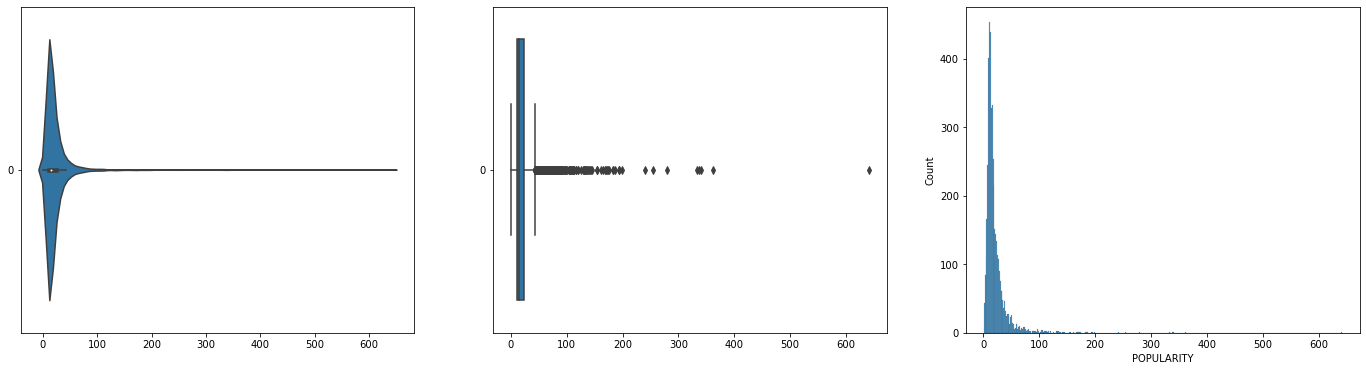

In [18]:
Uni_Variate(movie_data["POPULARITY"])

<AxesSubplot:xlabel='POPULARITY', ylabel='Count'>

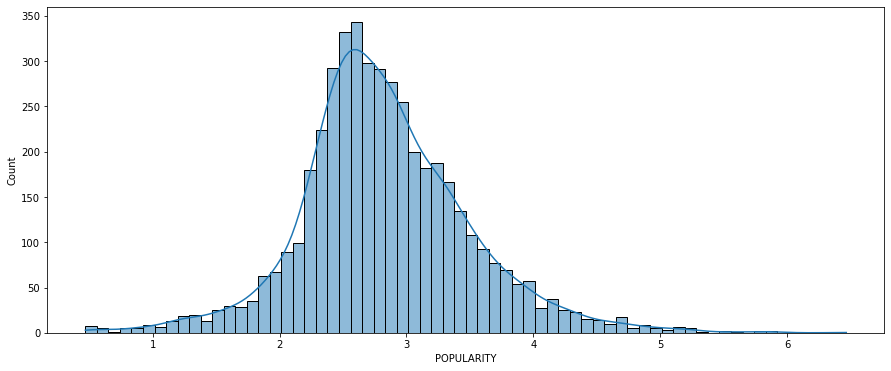

In [19]:
movie_data["POPULARITY"] = np.log(movie_data["POPULARITY"] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movie_data["POPULARITY"], kde=True)

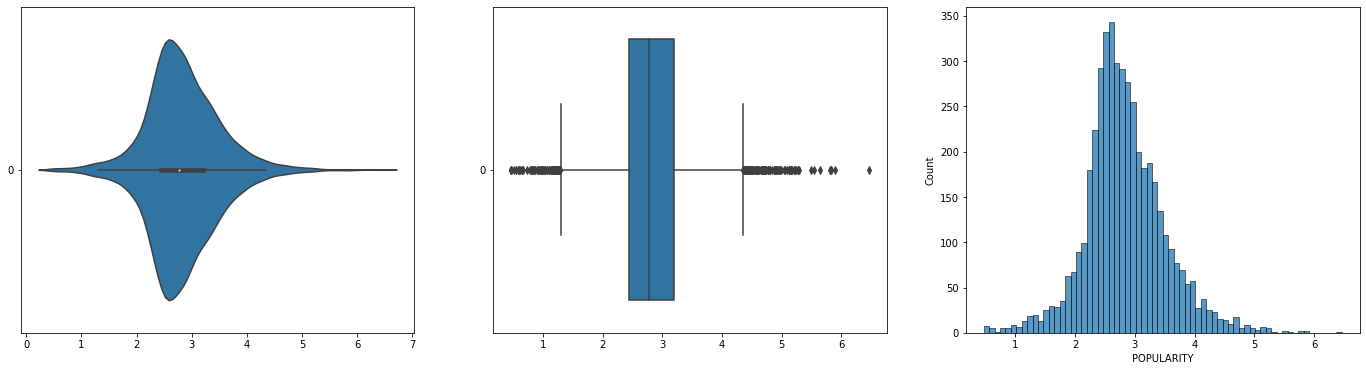

In [20]:
Uni_Variate(movie_data["POPULARITY"])

<Figure size 1728x288 with 0 Axes>

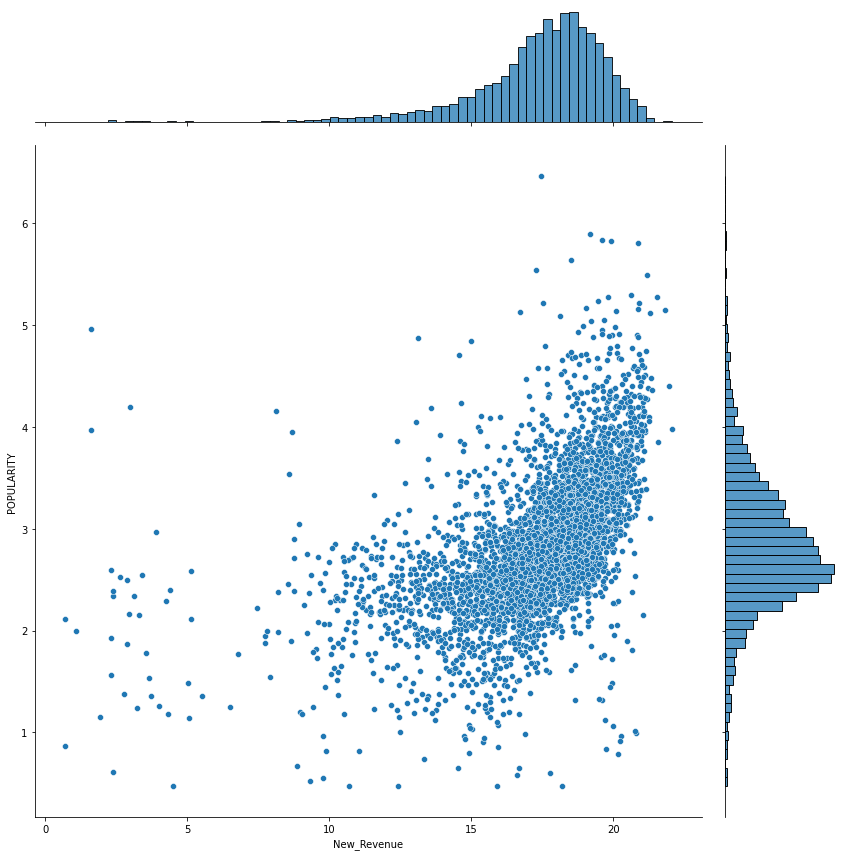

In [21]:
Bi_Variate(movie_data, 'New_Revenue', "POPULARITY")

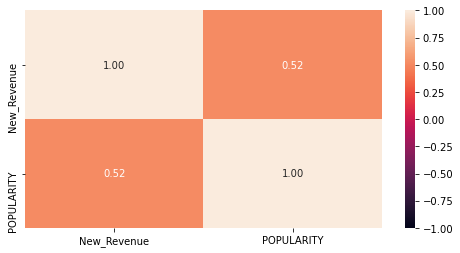

In [22]:
Correlation(movie_data, 'New_Revenue', "POPULARITY")

LINEAR REGRESSION

In [23]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data['POPULARITY'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (3429, 1) (3429, 1)
Test Set  : (1143, 1) (1143, 1)


In [24]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [11.63150373]
Coefficients : a =  [[2.02289405]]


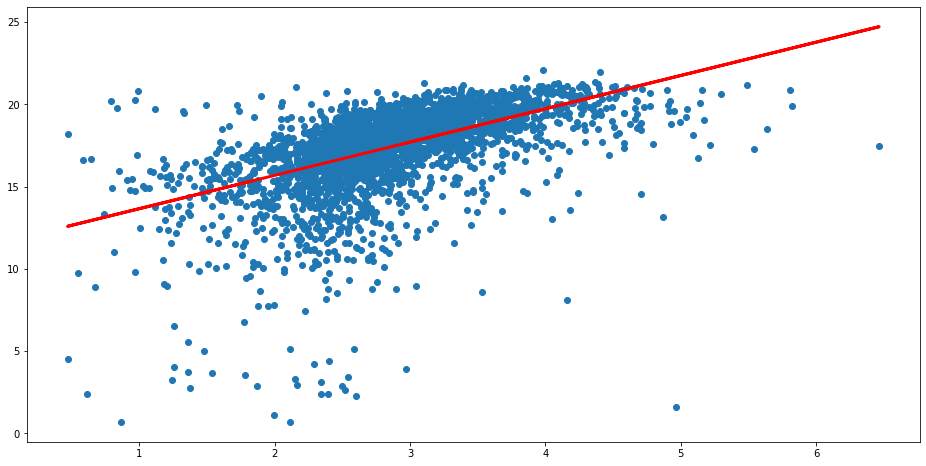

In [25]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [26]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.27230806897316373
Mean Squared Error (MSE) 	: 4.762350912143513


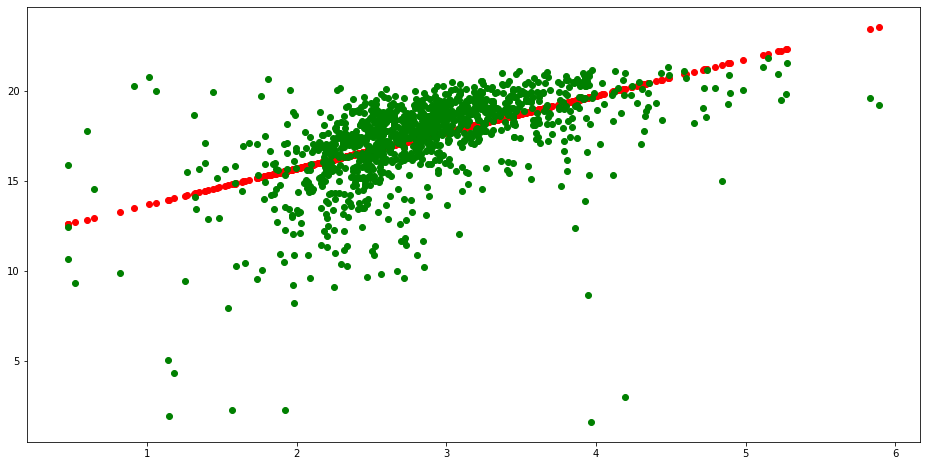

In [27]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

PREDICT REVENUE VALUE USING  VOTE_AVERAGE

In [28]:
movie_data.sort_values(by = 'VOTE_AVERAGE', ascending = False)
movie_data.head()

,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,TAGLINE,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,17000000,6.465574,35878266,7.1,602,Escape The Apocalypse,2020,7,16.706993,17.453911,7
1,75000000,5.892299,201858461,7.2,6022,Mind Over Mayhem,2020,5,18.191268,19.181346,7
2,90000000,5.824069,419074646,7.2,5392,Ride together. Die together.,2020,1,18.373589,19.911829,7
3,42000000,5.540852,30234182,7.0,3216,Being a superhero is in his blood,2020,5,17.611449,17.282753,7
4,200000000,5.636467,103181419,7.9,3243,Their quest begineth.,2020,2,19.172097,18.510268,8


In [29]:
rate_0 = movie_data[movie_data['New_Vote_Avg'] ==0]
rate_1 = movie_data[movie_data['New_Vote_Avg'] ==1] #54
rate_2 = movie_data[movie_data['New_Vote_Avg']==  2] #6
rate_3 = movie_data[movie_data['New_Vote_Avg'] == 3] #21
rate_4 = movie_data[movie_data['New_Vote_Avg']==  4]#69
rate_5 = movie_data[movie_data['New_Vote_Avg'] == 5 ] #378
rate_6 = movie_data[movie_data['New_Vote_Avg'] == 6]  #1697
rate_7 = movie_data[movie_data['New_Vote_Avg'] == 7]  #2888
rate_8 = movie_data[movie_data['New_Vote_Avg'] == 8]  #1457
rate_9 = movie_data[movie_data['New_Vote_Avg']==  9 ] #140
rate_10 = movie_data[movie_data['New_Vote_Avg']==  10] #11  
                    #Total = 6721

In [30]:
rate_8.head()

,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,TAGLINE,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
4,200000000,5.636467,103181419,7.9,3243,Their quest begineth.,2020,2,19.172097,18.510268,8
5,85000000,5.832448,306766470,7.5,5877,A Whole New Speed of Hero,2020,12,18.316431,19.599866,8
6,100000000,5.271409,374733942,7.9,6678,Time is the enemy,2019,12,18.496901,19.817947,8
9,175000000,5.295087,800526015,8.2,12316,The celebration of a lifetime,2017,10,19.101629,20.622112,8
10,300000000,5.275438,2046239637,8.3,19901,An entire universe. Once and for all.,2018,4,19.619591,21.539567,8


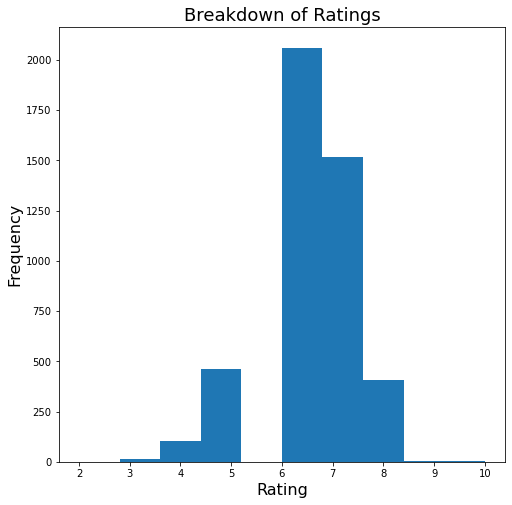

In [31]:
movie_data['New_Vote_Avg'].plot(kind='hist', figsize = (8,8));
plt.title('Breakdown of Ratings', fontsize = 18)
plt.xlabel('Rating', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

In [32]:
revenue_vote= pd.DataFrame(movie_data, columns= ['New_Revenue','New_Vote_Avg'])

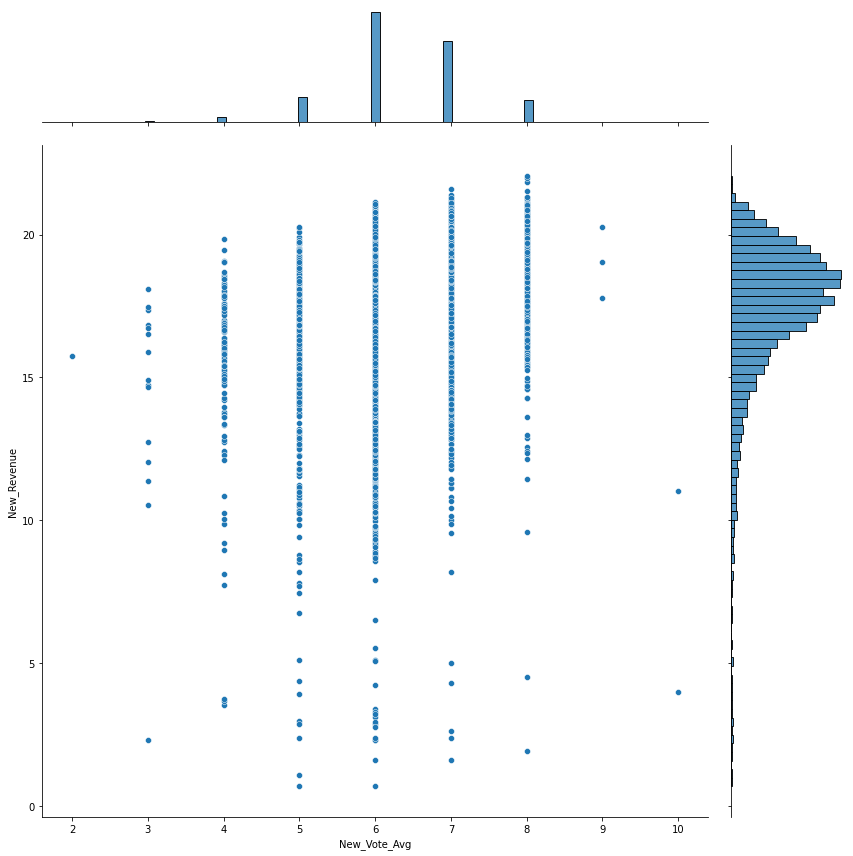

In [33]:
sb.jointplot(data = revenue_vote, x = 'New_Vote_Avg', y = 'New_Revenue', height = 12)

In [34]:
revenue_vote.describe()

,New_Revenue,New_Vote_Avg
count,4572.000000,4572.000000
mean,17.341784,6.356080
std,2.552129,0.894366
min,0.693147,2.000000
25%,16.447872,6.000000
50%,17.824783,6.000000
75%,18.968278,7.000000
max,22.053321,10.000000


<AxesSubplot:xlabel='New_Vote_Avg', ylabel='New_Revenue'>

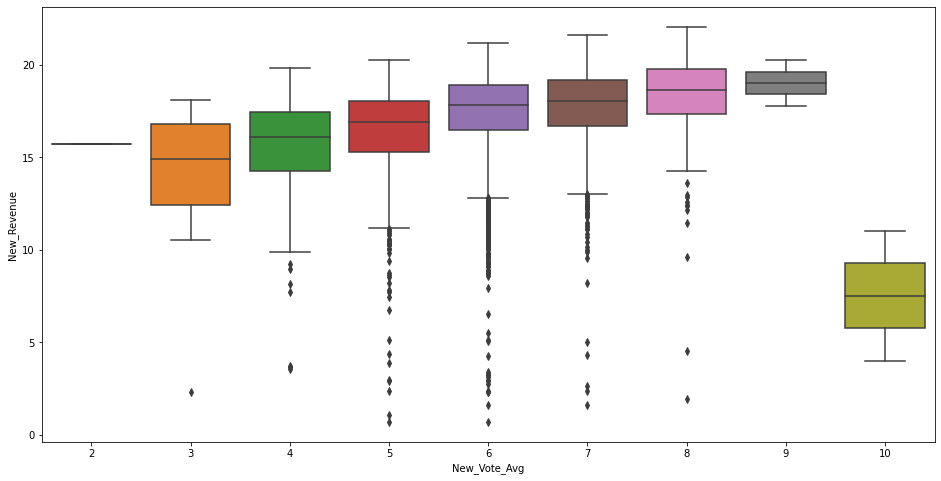

In [35]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'New_Vote_Avg', y = 'New_Revenue', data = revenue_vote)

In [36]:
movie_data.corr()

,BUDGET,POPULARITY,REVENUE,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
BUDGET,1.000000,0.502927,0.740477,0.098373,0.583753,0.126514,0.041822,0.598705,0.527713,0.091488
POPULARITY,0.502927,1.000000,0.532354,0.273118,0.591775,0.327793,0.034738,0.386786,0.521604,0.258037
REVENUE,0.740477,0.532354,1.000000,0.255690,0.767649,0.130052,0.035556,0.390617,0.521420,0.237356
VOTE_AVERAGE,0.098373,0.273118,0.255690,1.000000,0.422689,0.045413,0.073458,0.055619,0.252890,0.945264
VOTE_COUNT,0.583753,0.591775,0.767649,0.422689,1.000000,0.179175,0.029736,0.330890,0.475384,0.395641
release_year,0.126514,0.327793,0.130052,0.045413,0.179175,1.000000,-0.014554,-0.055911,-0.016761,0.044542
release_month,0.041822,0.034738,0.035556,0.073458,0.029736,-0.014554,1.000000,0.072842,0.075624,0.067137
New_Budget,0.598705,0.386786,0.390617,0.055619,0.330890,-0.055911,0.072842,1.000000,0.709541,0.051595
New_Revenue,0.527713,0.521604,0.521420,0.252890,0.475384,-0.016761,0.075624,0.709541,1.000000,0.240505
New_Vote_Avg,0.091488,0.258037,0.237356,0.945264,0.395641,0.044542,0.067137,0.051595,0.240505,1.000000


0                                   Escape The Apocalypse
1                                        Mind Over Mayhem
2                            Ride together. Die together.
3                       Being a superhero is in his blood
4                                   Their quest begineth.
                              ...                        
4567                                     Terror Has Teeth
4568               Lose your hang-ups. Find your calling.
4569                  How far can a losing shot take you?
4570    A comedy about doing the right thing with the ...
4571                                 Destroyed in love...
Name: TAGLINE, Length: 4572, dtype: object

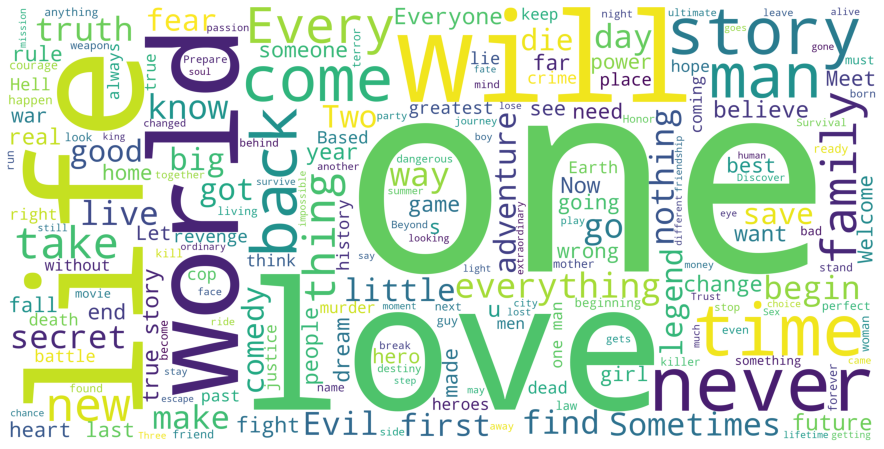